In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Grafiklerin her birinde xlabel, ylabel ve title olsun. Başkası grafiğe baktığında anlayabilsin, grafikler kendini açıklayıcı olsun.

Renklendirmeler ve marker seçimleri uyumlu olsun.

Parametreler için seaborn'un kendi sitesinden faydalanabilirsiniz.

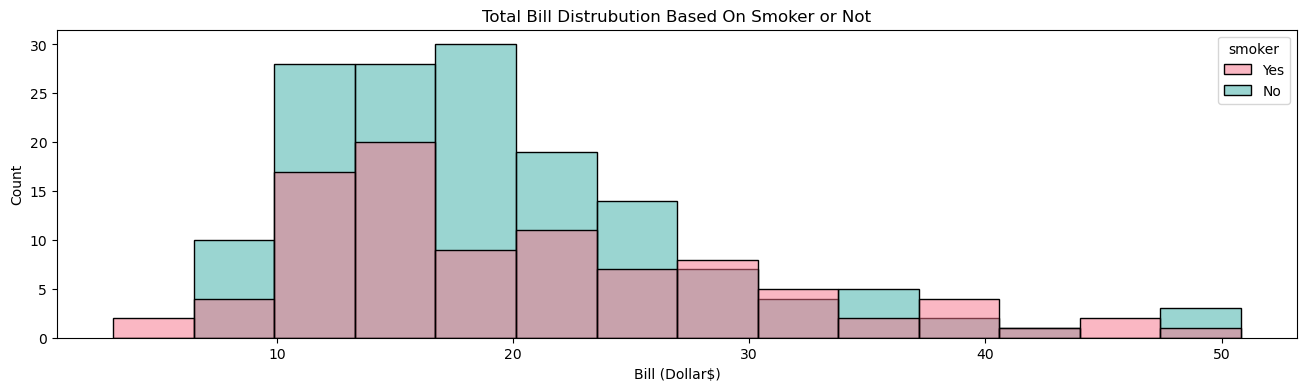

In [2]:
# Soru: Sigara içen ve içmeyen müşterilerin fatura tutarlarının dağılımını gösteren bir histogram oluşturun.
plt.figure(figsize=(16,4))
sns.histplot(data=tips, x='total_bill', hue='smoker', palette='husl')
plt.xlabel('Bill (Dollar$)')
plt.title("Total Bill Distrubution Based On Smoker or Not")
plt.show()

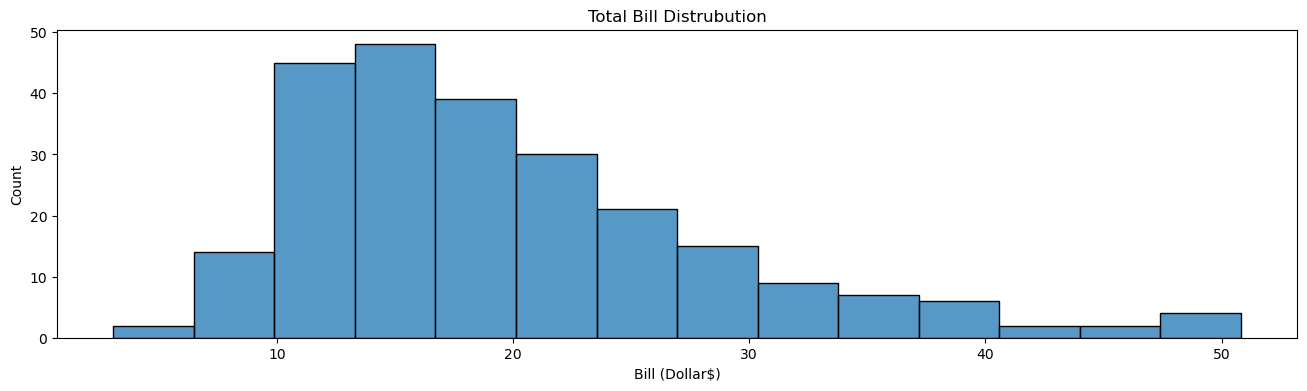

In [3]:
# Soru: Veri setindeki "total_bill" değişkeninin dağılımını gösteren bir histogram oluşturun.
plt.figure(figsize=(16,4))
sns.histplot(data=tips, x='total_bill')
plt.xlabel('Bill (Dollar$)')
plt.title("Total Bill Distrubution")
plt.show()

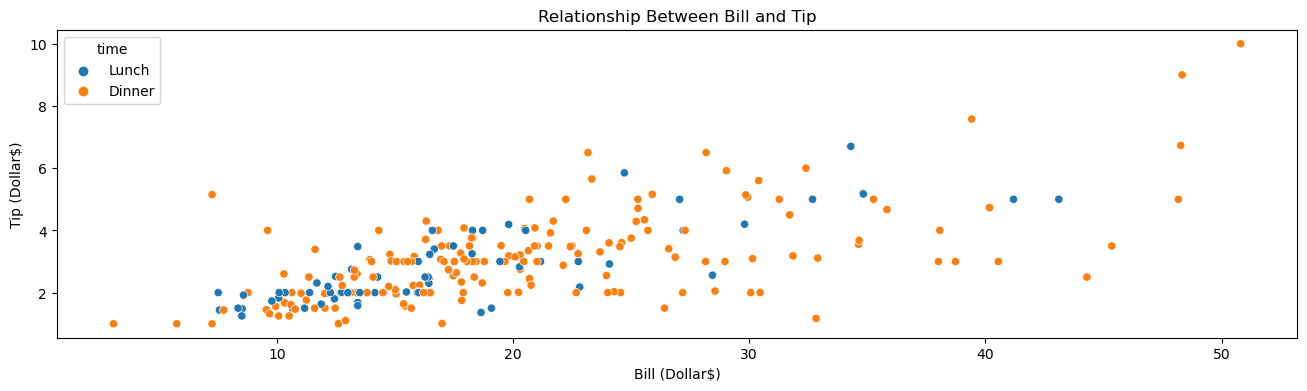

In [4]:
# Soru: Veri setindeki "total_bill" ve "tip" değişkenleri arasındaki ilişkiyi gösteren bir 
# scatterplot oluşturun. Ayrıca, "time" değişkenini kullanarak noktaları renklendirin.
plt.figure(figsize=(16,4))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.xlabel('Bill (Dollar$)')
plt.ylabel('Tip (Dollar$)')
plt.title("Relationship Between Bill and Tip")
plt.show()

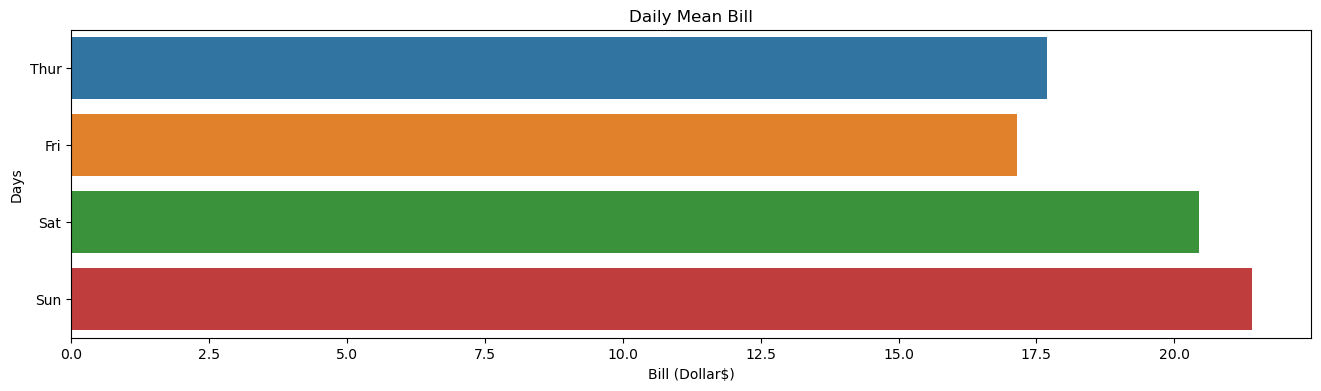

In [5]:
# Soru: Veri setindeki "day" ve "total_bill" değişkenlerini kullanarak, 
# her gün için ortalama toplam fatura tutarını gösteren bir barplot oluşturun.
tips_daily_df=tips.groupby(['day']).mean().reset_index()
plt.figure(figsize=(16,4))
sns.barplot(data=tips_daily_df, x='total_bill', y='day')
plt.xlabel('Bill (Dollar$)')
plt.ylabel('Days')
plt.title("Daily Mean Bill")
plt.show()

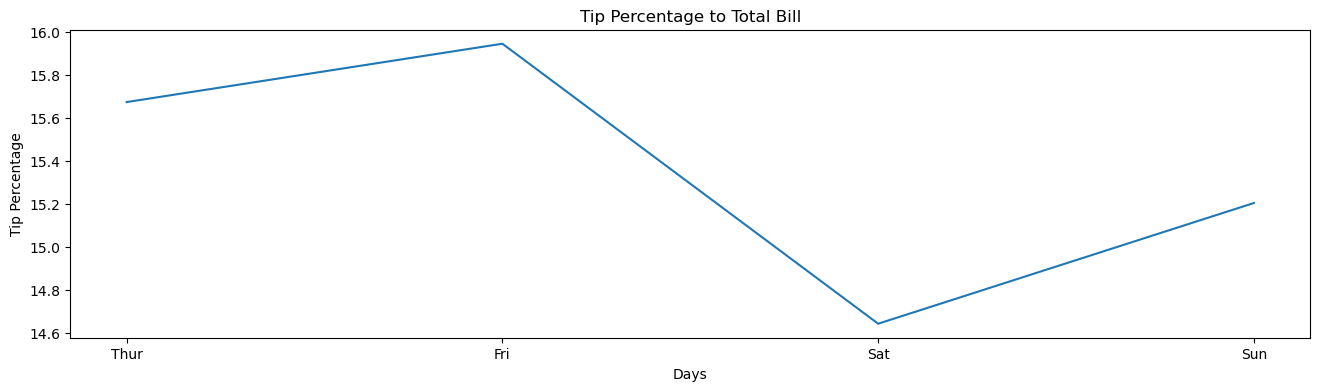

In [6]:
# Soru: "tips" veri setinde, her günün bahşiş oranını (yüzde olarak) hesaplayın 
# ve bunları gösteren bir line plot oluşturun.
tips_daily_df=tips.groupby(['day']).sum().reset_index()
tips_daily_df['tip_percentage(%)']=tips_daily_df['tip']/tips_daily_df['total_bill']*100
plt.figure(figsize=(16,4))
sns.lineplot(data=tips_daily_df, x='day', y='tip_percentage(%)')
plt.xlabel('Days')
plt.ylabel('Tip Percentage')
plt.title("Tip Percentage to Total Bill")
plt.show()

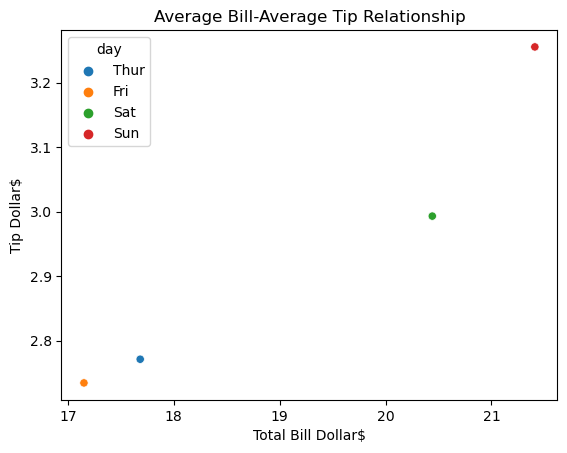

In [30]:
# Soru: "tips" veri setinde, her gün için fatura tutarının ve bahşiş miktarının ortalamasını hesaplayarak, 
# iki değişken arasındaki ilişkiyi gösteren bir scatterplot oluşturun.
daily_avg = tips.groupby('day')[['total_bill', 'tip']].mean().reset_index()
plt.xlabel('Total Bill Dollar$')
plt.ylabel('Tip Dollar$')
plt.title("Average Bill-Average Tip Relationship")
sns.scatterplot(data=daily_avg, x='total_bill', y='tip', hue='day')
plt.show()

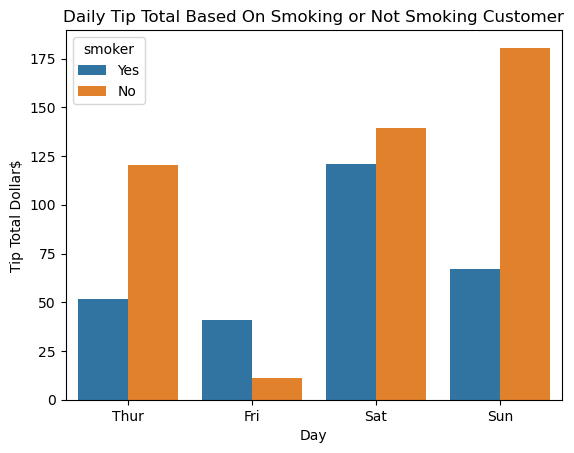

In [33]:
# Soru: Sigara içen ve içmeyen müşterilerin, farklı günlerde ödedikleri toplam
# bahşiş miktarını gösteren bir bar plot oluşturun.
df_daily_total = tips.groupby(['day', 'smoker'])['tip'].sum().reset_index()
sns.barplot(data=df_daily_total, x='day', y='tip', hue='smoker')
plt.xlabel('Day')
plt.ylabel('Tip Total Dollar$')
plt.title("Daily Tip Total Based On Smoking or Not Smoking Customer")
plt.show()

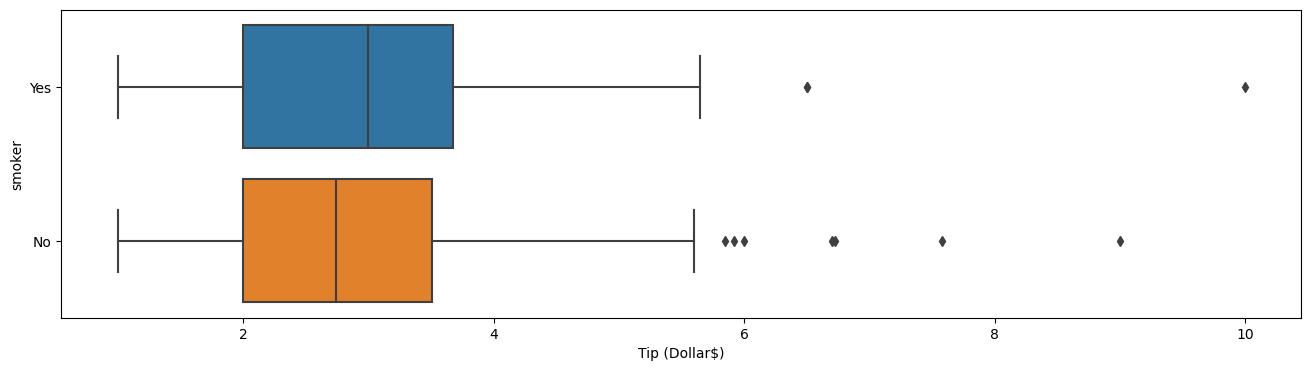

In [14]:
# Soru: Sigara içen ve içmeyen müşterilerin ödedikleri bahşiş miktarlarının
# dağılımını gösteren bir boxplot oluşturun.
plt.figure(figsize=(16,4))
sns.boxplot(data=tips, x='tip', y='smoker')
plt.xlabel('Tip (Dollar$)')
plt.show()

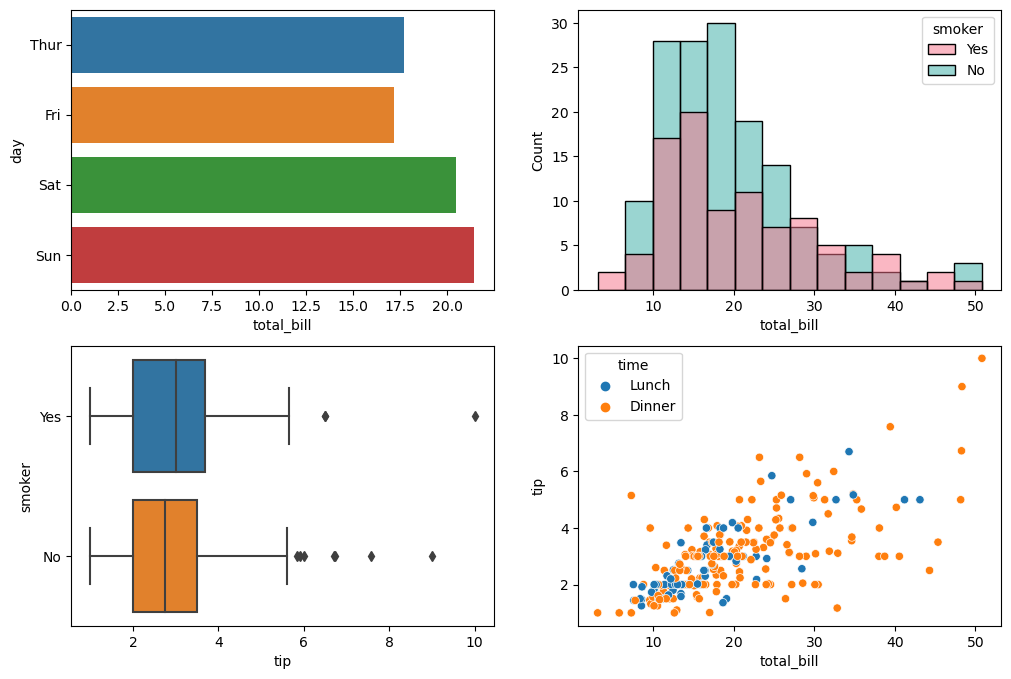

In [36]:
# Soru: Yukarıdan seçeceğiniz 4 farklı plotu, subplot kullanarak çizdirin.
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
sns.barplot(ax=axs[0,0], data=tips_daily_df, x='total_bill', y='day')
sns.histplot(ax=axs[0,1], data=tips, x='total_bill', hue='smoker', palette='husl')
sns.boxplot(ax=axs[1,0],data=tips, x='tip', y='smoker')
sns.scatterplot(ax=axs[1,1],data=tips, x='total_bill', y='tip', hue='time')
plt.show()